<a href="https://colab.research.google.com/github/Ebl14/senales_y_sistemas/blob/main/ejercicio_clase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

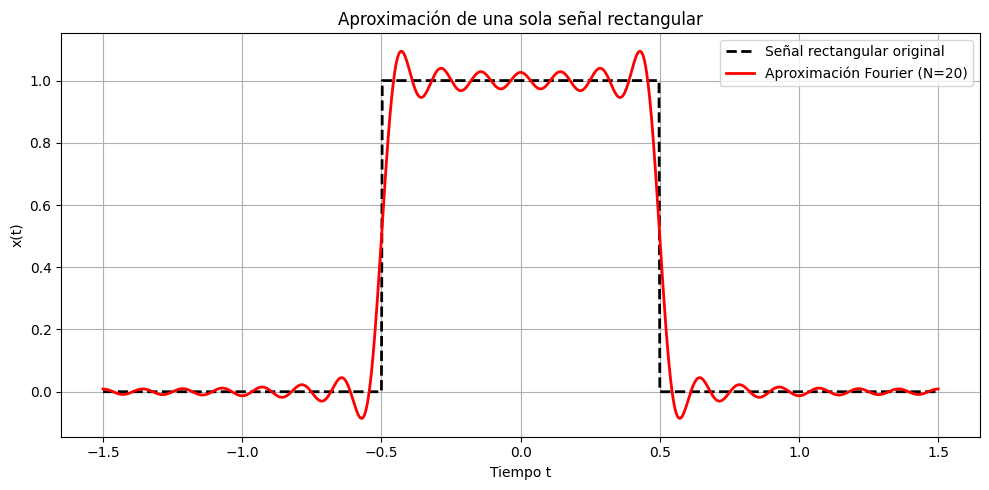

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
A = 1          # Amplitud
tau = 1        # Ancho del pulso
T = 3          # Periodo (> tau)
N = 20         # Número de términos en la serie

# Frecuencia angular fundamental
w0 = 2 * np.pi / T

# Tiempo solo alrededor del pulso rectangular (una réplica)
t = np.linspace(-1.5 * tau, 1.5 * tau, 1000)

# Aproximación por Serie de Fourier (que normalmente es periódica)
def fourier_series_rect(t, A, tau, T, N):
    a0 = A * tau / T
    result = a0 * np.ones_like(t)
    for n in range(1, N+1):
        sinc_term = np.sinc(n * tau / T)  # sinc normalizado
        an = 2 * A * tau / T * sinc_term
        result += an * np.cos(n * w0 * t)
    return result

# Señal rectangular original (una sola réplica)
def original_rect(t, A, tau):
    return A * ((np.abs(t) < tau/2).astype(float))

# Calcular
x_orig = original_rect(t, A, tau)
x_approx = fourier_series_rect(t, A, tau, T, N)

# Graficar
plt.figure(figsize=(10, 5))
plt.plot(t, x_orig, label='Señal rectangular original', color='black', linestyle='--', linewidth=2)
plt.plot(t, x_approx, label=f'Aproximación Fourier (N={N})', color='red', linewidth=2)
plt.title('Aproximación de una sola señal rectangular')
plt.xlabel('Tiempo t')
plt.ylabel('x(t)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

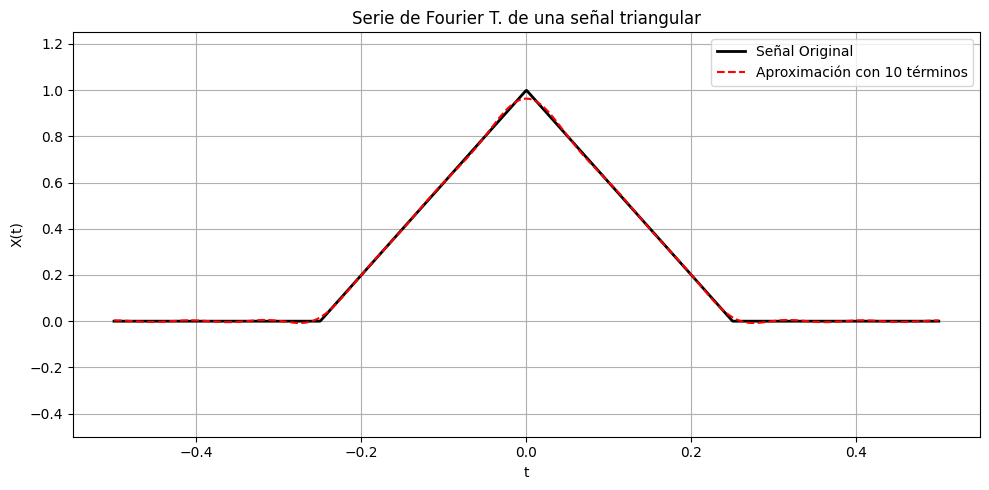

In [ ]:
import numpy as np                          # Importa NumPy para manejo numérico
import matplotlib.pyplot as plt             # Importa Matplotlib para graficar
from sympy import symbols, integrate, cos, pi, simplify, lambdify  # Funciones simbólicas

# Parámetros de la señal
T = 1                                       # Periodo (antes era tau_val)
A = 1                                       # Amplitud (antes era B_val)

# Declaración de variables simbólicas
tiempo, indice, periodo, amplitud = symbols('tiempo indice periodo amplitud', real=True)

# Definición de la señal triangular por tramos
tramo_izq = (4 * amplitud / periodo) * (tiempo + periodo / 4)     # Tramo izquierdo: [-T/4, 0]
tramo_der = (-4 * amplitud / periodo) * (tiempo - periodo / 4)    # Tramo derecho: [0, T/4]

# Cálculo del coeficiente a0 (término constante de la serie)
coef_a0 = (2 / periodo) * (
    integrate(tramo_izq, (tiempo, -periodo / 4, 0)) +
    integrate(tramo_der, (tiempo, 0, periodo / 4))
)

# Cálculo del coeficiente an (sólo cosenos porque es par)
coef_an = (2 / periodo) * (
    integrate(tramo_izq * cos(2 * pi * indice * tiempo / periodo), (tiempo, -periodo / 4, 0)) +
    integrate(tramo_der * cos(2 * pi * indice * tiempo / periodo), (tiempo, 0, periodo / 4))
)

# Sustitución de valores concretos en los coeficientes
valor_a0 = coef_a0.subs({periodo: T, amplitud: A})
expresion_an = simplify(coef_an.subs({periodo: T, amplitud: A}))

# Se convierte an a una función numérica con lambdify
funcion_an = lambdify(indice, expresion_an, modules=["numpy"])

# Número de términos para la aproximación de Fourier
num_terminos = 10
valores_n = np.arange(1, num_terminos + 1)                      # n = 1, 2, ..., N
valores_an = np.array([funcion_an(k) for k in valores_n])      # Calcula an para cada n

# Valores del tiempo para graficar
tiempo_discreto = np.linspace(-T / 2, T / 2, 1000)

# Inicializa la señal aproximada con a0/2
senal_aproximada = np.full_like(tiempo_discreto, float(valor_a0) / 2)

# Construcción de la serie de Fourier suma de cosenos
for i, valor_an in enumerate(valores_an, start=1):
    senal_aproximada += valor_an * np.cos(2 * np.pi * i * tiempo_discreto / T)

# Función por tramos de la señal original
def senal_original(t_array):
    resultado = np.zeros_like(t_array)
    for i, t_i in enumerate(t_array):
        if -T / 4 <= t_i < 0:
            resultado[i] = (4 * A / T) * (t_i + T / 4)
        elif 0 <= t_i <= T / 4:
            resultado[i] = (-4 * A / T) * (t_i - T / 4)
    return resultado

# Evaluar la señal original
senal_real = senal_original(tiempo_discreto)

# Gráfica comparativa
plt.figure(figsize=(10, 5))  # Tamaño de figura
plt.plot(tiempo_discreto, senal_real, label='Señal Original', color = 'black', linewidth=2)
plt.plot(tiempo_discreto, senal_aproximada, '--', label=f'Aproximación con {num_terminos} términos', color = 'red')
plt.title('Serie de Fourier T. de una señal triangular')
plt.xlabel('t')
plt.ylabel('X(t)')
plt.ylim(-0.5, 1.25)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
